In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import scipy.linalg as la
from scipy.stats import linregress, expon, kstest
import powerlaw
from extract_durations import find_alliance_duration, find_conflict_duration, find_neutrality_duration


import matplotlib
matplotlib.rc('xtick',labelsize=16)
matplotlib.rc('ytick',labelsize=16)
matplotlib.rc('font',size = 24)
matplotlib.rc('legend',fontsize = 17)
matplotlib.rc('figure',titlesize = 25)

# Interevent time distributions

In [16]:
# extract data of the IET
def extract_data_IET(filepath):

    #import excel file 
    df_dict = pd.read_excel(filepath, sheet_name=None, header = None)

    # combine excel sheets
    df_all = pd.concat(df_dict.values())
    measurements = (np.array(df_all).T)[0]

    return measurements




    
# extract balance of balance drops and incresases
def extract_data_sizes(filepath):

    #import excel file 
    df_dict = pd.read_excel(filepath, sheet_name=None)

    # combine excel sheets
    df_all = pd.concat(df_dict.values())
    measurements = np.array(df_all['X2'])

    # find messy data and filter/adapt it
    to_remove = []
    for idx, measurement in enumerate(measurements):

        if isinstance(measurement,float) == False:

            # if it is a number somehow stored as a string
            try:
                measurement[idx] = float(measurement)

            # if it is a pure string, store it to remove it
            except:
                to_remove.append(idx)


    # remove pure strings from data
    measurements = np.delete(measurements, to_remove)
    
    return measurements






# compare exp and power law fits

def plot_and_fit(ax, measurements, color, x_min = None, x_max = None, xmin_MLE = None ):

    # x_min and x_max define the interval in which we plot the histogram
    # xmin_MLE sets the value of x after which the power law fit is made (it is irrelevant in the exponential fit)
    
    if x_min == None: x_min = np.min(measurements)
    if x_max == None: x_max = np.max(measurements)
        
    # exponential fit

    params = expon.fit(measurements)
    p_expon = kstest(measurements, 'expon', params)[1]  # Kolmogorov-Smirnov test
    
    # power law fit
    if xmin_MLE == None: fit = powerlaw.Fit(measurements)
    else: fit = powerlaw.Fit(measurements, xmin = xmin_MLE)
    
    R, p_pl = fit.distribution_compare('power_law', 'exponential')   #KS test
    
    # choose the best fit
    if R > 10: 


        print('Power law fit is better')
        
        print(f'Power law fit: y ~ x^alpha: \n'
        f'alpha:{fit.alpha}\n'
        f'xmin: {fit.xmin}\n'
        f'R: {R}\n'
        f'p-value: {p_pl}\n')

        # plot histogram
        bins = np.logspace(np.log10(x_min), np.log10(x_max), 20)
        plt.hist(measurements, bins= bins, density=True, color = color, alpha=0.7, edgecolor='k' )

        # plot fit
        x = np.linspace(fit.xmin, np.max(bins))
        plt.plot(x, fit.power_law.pdf(x), 'k--', lw=2)
        
        # plot xmin
        ax.plot([fit.xmin,fit.xmin],[0,2],'k', ls = ':')
        ax.set_xlabel('Duration (yr)', fontsize = 20)
        ax.set_ylabel('Probability', fontsize = 20)
        ax.set_xscale('log') 
        ax.set_yscale('log') 
        
            
    else:
        
        print('Exp. fit is better')

        print(f'Exponential fit: y =  exp(-\lambda (x-x0)): \n'
        f'\lambda :{1/params[1]}\n'
        f'x_0: {params[0]}\n'
        f'p-value: {p_expon}\n')

        # Plot the histogram of the measurements
        bins = np.linspace(x_min, x_max, 20)
        plt.hist(measurements, bins= bins, density=True, color = color, alpha=0.7, edgecolor='k' )


        # Plot the fitted exponential distribution
        x = np.linspace(0, x_max)
        plt.plot(x, expon.pdf(x, *params), 'k--', lw=2)

        ax.set_xlabel('Duration (yr)', fontsize = 20)
        ax.set_ylabel('Probability', fontsize = 20)
        ax.set_yscale('log') 
        

    
    return ax
    

# Distribution of sizes

--------------------------
INCREASES
Calculating best minimal value for power law fit
Exp. fit is better
Exponential fit: y =  exp(-\lambda (x-x0)): 
\lambda :7.1552882263275555
x_0: 0.1003275
p-value: 7.079339635316681e-07

--------------------------
DROPS
Calculating best minimal value for power law fit
Exp. fit is better
Exponential fit: y =  exp(-\lambda (x-x0)): 
\lambda :9.4276910366441
x_0: 0.100191429
p-value: 0.0008787709716696712



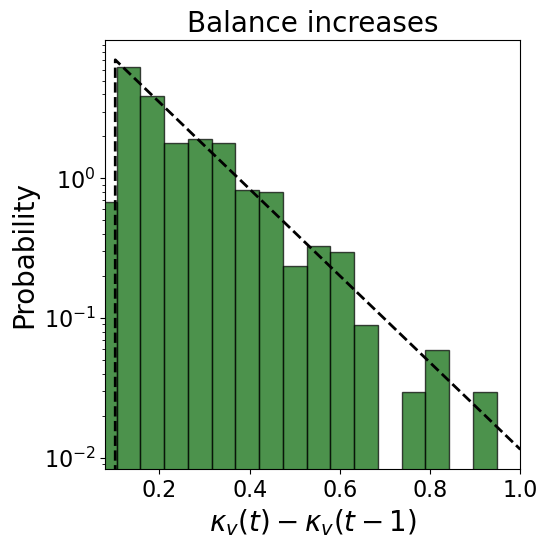

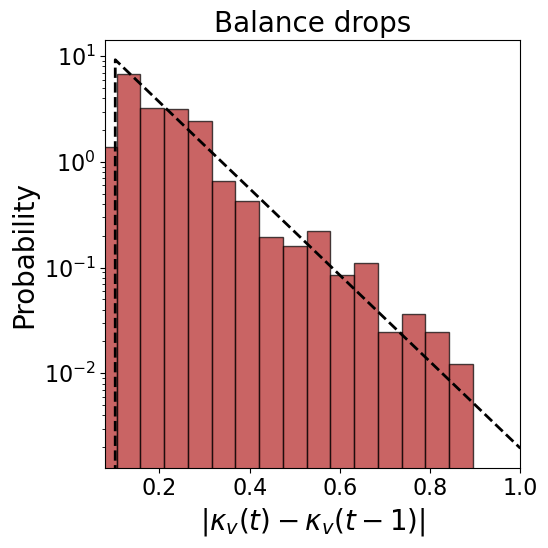

In [17]:
print('--------------------------\nINCREASES')

filepath =  'magnitude_sizes/Magnitude_Increases.xlsx'
measurements_incr = extract_data_sizes(filepath)

fig, ax = plt.subplots(figsize = (6,6))
ax = plot_and_fit(ax, measurements_incr, color = 'darkgreen', x_min = 0, x_max = 1)
ax.set_xlabel(r'$\kappa_v(t)-\kappa_v(t-1)$', fontsize = 20)
ax.set_title('Balance increases', fontsize = 20)
ax.set_xlim([0.08,1])
fig.tight_layout()
plt.savefig('Balance_increases_histogram.pdf')

print('--------------------------\nDROPS')

filepath = 'magnitude_sizes/Magnitude_Drops.xlsx'
measurements_drops = extract_data_sizes(filepath).astype(float)

fig, ax = plt.subplots(figsize = (6,6))
ax = plot_and_fit(ax, np.abs(measurements_drops), color = 'firebrick', x_min = 0, x_max = 1)
ax.set_xlabel(r'$|\kappa_v(t)-\kappa_v(t-1)|$', fontsize = 20)
ax.set_title('Balance drops', fontsize = 20)
ax.set_xlim([0.08,1])
fig.tight_layout()
plt.savefig('Balance_drops_histogram.pdf')



# IET distributions

--------------------------
INCREASES


/home/fernandodiaz/.conda/envs/basic/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Power law fit is better
Power law fit: y ~ x^alpha: 
alpha:2.8701972959444584
xmin: 10.0
R: 26.161631547862967
p-value: 0.004206047656027559

--------------------------
DROPS
Calculating best minimal value for power law fit
Power law fit is better
Power law fit: y ~ x^alpha: 
alpha:2.0650012907229423
xmin: 5.0
R: 38.089939148862214
p-value: 0.0006944317229813002



/home/fernandodiaz/.conda/envs/basic/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


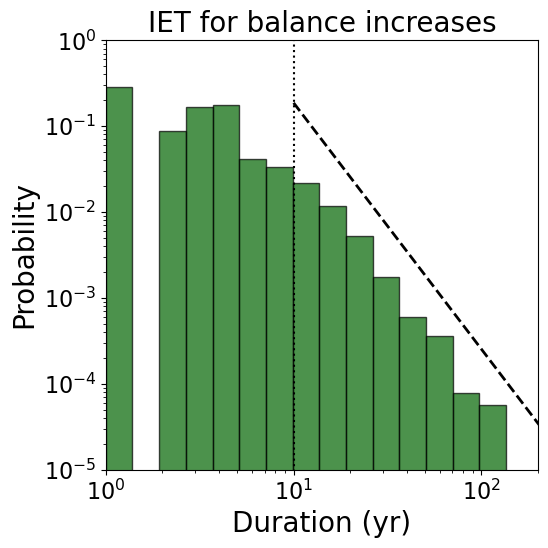

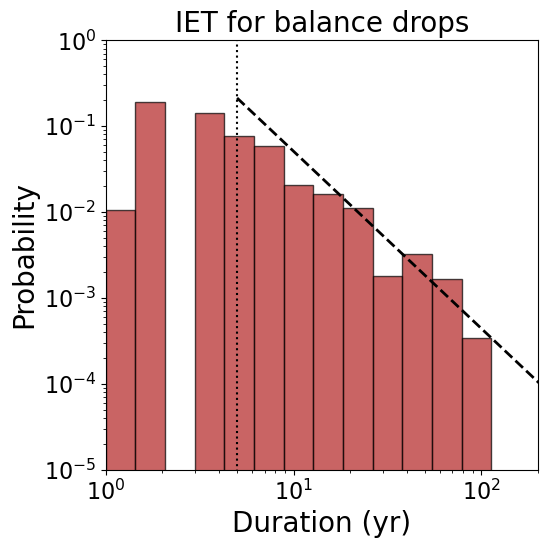

In [19]:
# we are interested in mid- and high-risk events, so we take the excel file with the 03 subindex for the drops, that contains drops of a magnitude larger than .3
# we take the 01 file for the increases, because for increases the mid-risk is Delta kappa >0.1

print('--------------------------\nINCREASES')

filepath =  'IET/Increases01.xlsx'
measurements_incr = extract_data_IET(filepath)

fig, ax = plt.subplots(figsize = (6,6))
ax = plot_and_fit(ax, measurements_incr, color = 'darkgreen', x_min = 1, x_max = 5e2, xmin_MLE = 10)

ax.set_xlabel('Duration (yr)', fontsize = 20)
ax.set_ylabel('Probability', fontsize = 20)
ax.set_title('IET for balance increases', fontsize = 20)
ax.set_xlim([1,200])
ax.set_ylim([1e-5,1e0])
    
fig.tight_layout()
plt.savefig('IET_increases_histogram.pdf')

print('--------------------------\nDROPS')

filepath = 'IET/Drops03.xlsx'
measurements_drops = extract_data_IET(filepath)
fig, ax = plt.subplots(figsize = (6,6))
ax = plot_and_fit(ax, np.abs(measurements_drops), color = 'firebrick', x_min = 1, x_max = 1e3)
ax.set_xlabel('Duration (yr)', fontsize = 20)
ax.set_title('IET for balance drops', fontsize = 20)
ax.set_xlim([1,200])
ax.set_ylim([1e-5,1e0])
    
fig.tight_layout()
plt.savefig('IET_drops_histogram.pdf')



# Duration of conflicts/alliances

In [11]:
# find duration of alliances, conflicts...

alliance_duration = find_alliance_duration()
conflict_duration = find_conflict_duration()
neutrality_duration = find_neutrality_duration()

--------------------------
ALLIANCES
Calculating best minimal value for power law fit
Exp. fit is better
Exponential fit: y =  exp(-\lambda (x-x0)): 
\lambda :0.055738330234110525
x_0: 1.0
p-value: 1.1813193379846287e-150

--------------------------
CONFLICTS
Calculating best minimal value for power law fit
Power law fit is better
Power law fit: y ~ x^alpha: 
alpha:2.5788577157487986
xmin: 1.0
R: 2411.337398309953
p-value: 4.200091003667189e-144

--------------------------
NEUTRALITY
Calculating best minimal value for power law fit
Exp. fit is better
Exponential fit: y =  exp(-\lambda (x-x0)): 
\lambda :0.07393205000383464
x_0: 1.0
p-value: 3.0425596933765156e-115



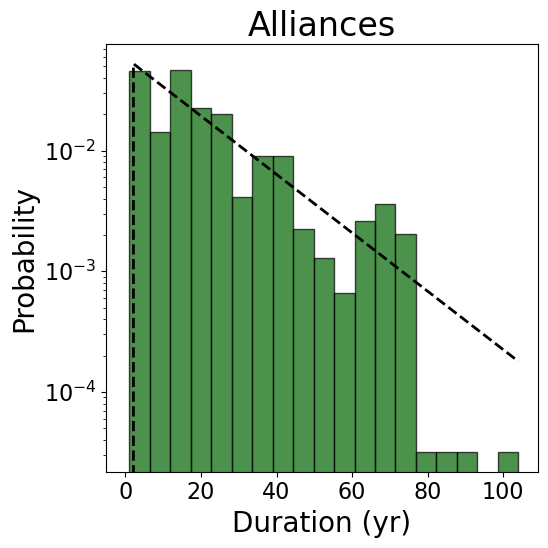

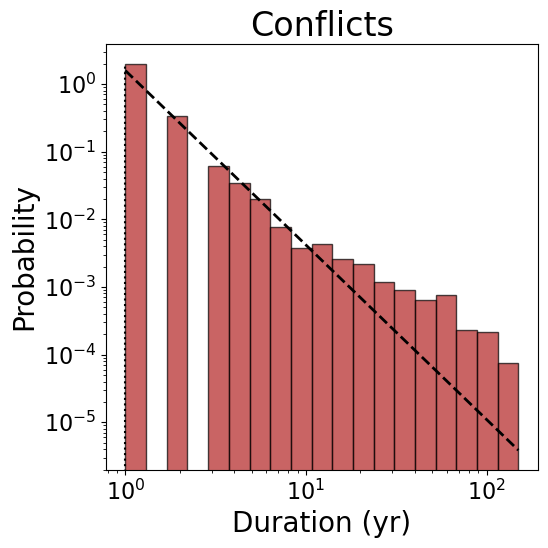

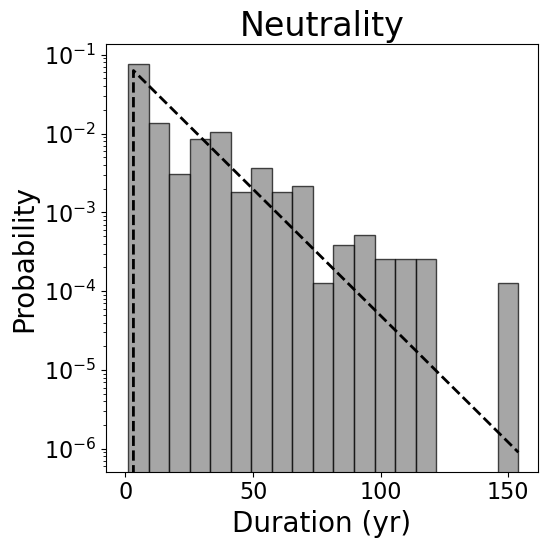

In [15]:

print('--------------------------\nALLIANCES')

fig, ax = plt.subplots(figsize = (6,6))
ax = plot_and_fit(ax, alliance_duration, color = 'darkgreen')
ax.set_xlabel('Duration (yr)', fontsize = 20)
ax.set_ylabel('Probability', fontsize = 20)
ax.set_title('Alliances', fontsize = 24)
fig.tight_layout()
plt.savefig('Alliance_duration_histograms.pdf')

print('--------------------------\nCONFLICTS')

fig, ax = plt.subplots(figsize = (6,6))
ax = plot_and_fit(ax, conflict_duration, color = 'firebrick', x_max = 150)
ax.set_xlabel('Duration (yr)', fontsize = 20)
ax.set_title('Conflicts', fontsize = 24)
fig.tight_layout()
plt.savefig('Conflict_duration_histograms.pdf')

print('--------------------------\nNEUTRALITY')

fig, ax = plt.subplots(figsize = (6,6))
ax = plot_and_fit(ax, neutrality_duration, color = 'grey')
ax.set_xlabel('Duration (yr)', fontsize = 20)
ax.set_title('Neutrality', fontsize = 24)
fig.tight_layout()
plt.savefig('Neutrality_duration_histograms.pdf')